# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import argparse
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from IPython.display import display
from torchvision.models import resnet18, resnet50
from tqdm.notebook import tqdm

from dataset import get_dloader, normalize, normalize_inv

C:\Users\runes\.conda\envs\context\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


# Noise data

In [213]:
trainloader = get_dloader('train', 1, data_dir="../data", noise=True)

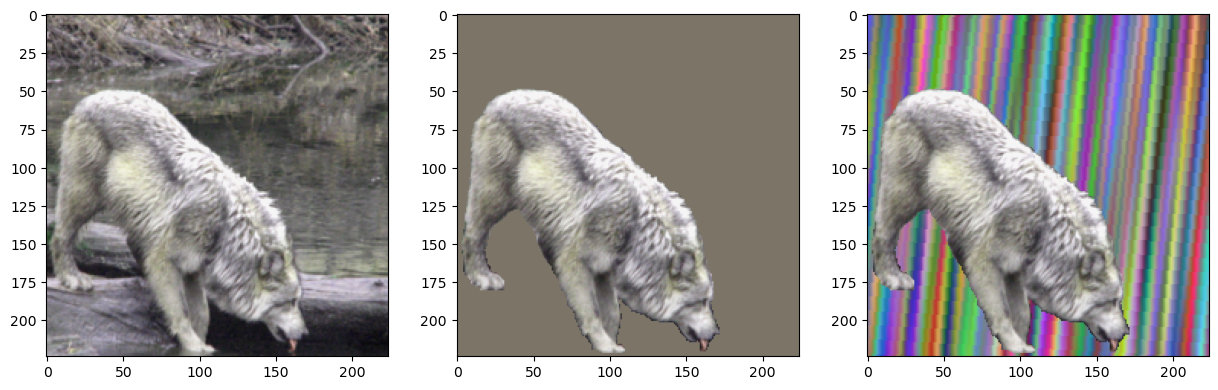

In [274]:
imgs, labels, masks, noise = next(iter(trainloader))
inputs = (imgs, imgs * masks, imgs * masks + noise * (~masks))
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for in_img, ax in zip(inputs, axs):
    ax.imshow(np.moveaxis(normalize_inv(in_img).numpy()[0], 0, -1))